In [92]:
import pandas as pd

df=pd.read_csv('..\\data\\fraud.csv', index_col = 0)
y = df['Class'].values
df = df.iloc[:,1:]
print(df.shape)
X = df.drop(columns = 'Class').values

(21693, 30)


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)

In [94]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [95]:
#MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_scaled, y_train)


MultinomialNB(alpha=0.1)

In [96]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=0.1)  
bnb.fit(X_train, y_train)

BernoulliNB(alpha=0.1)

In [97]:
#--------------------------------------------------
## Model Evaluation ## 
#--------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

#GaussianNB
ypred_test_gnb = gnb.predict(X_test)
y_test_proba_gnb = gnb.predict_proba(X_test)[:,1]
mat_clf = confusion_matrix(y_test, ypred_test_gnb)
report_clf = classification_report(y_test, ypred_test_gnb)

print(mat_clf)
print(report_clf)


[[8349  192]
 [  19  118]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8541
           1       0.38      0.86      0.53       137

    accuracy                           0.98      8678
   macro avg       0.69      0.92      0.76      8678
weighted avg       0.99      0.98      0.98      8678



In [98]:
#MultinomialNB
ypred_test_mnb = mnb.predict(X_test_scaled)
y_test_proba_mnb = mnb.predict_proba(X_test_scaled )[:,1]
mat_clf = confusion_matrix(y_test, ypred_test_mnb)
report_clf = classification_report(y_test, ypred_test_mnb)

print(mat_clf)
print(report_clf)

[[8541    0]
 [ 137    0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8541
           1       0.00      0.00      0.00       137

    accuracy                           0.98      8678
   macro avg       0.49      0.50      0.50      8678
weighted avg       0.97      0.98      0.98      8678



c:\Users\DELL\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [99]:
#BernoulliNB
ypred_test_bnb = bnb.predict(X_test)
y_test_proba_bnb = bnb.predict_proba(X_test )[:,1]
mat_clf = confusion_matrix(y_test, ypred_test_bnb)
report_clf = classification_report(y_test, ypred_test_bnb)

print(mat_clf)
print(report_clf)

[[8533    8]
 [  33  104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.93      0.76      0.84       137

    accuracy                           1.00      8678
   macro avg       0.96      0.88      0.92      8678
weighted avg       1.00      1.00      1.00      8678



### Plotting ROC Curve 

AUC Score for GaussianNB : 0.9712558658664049


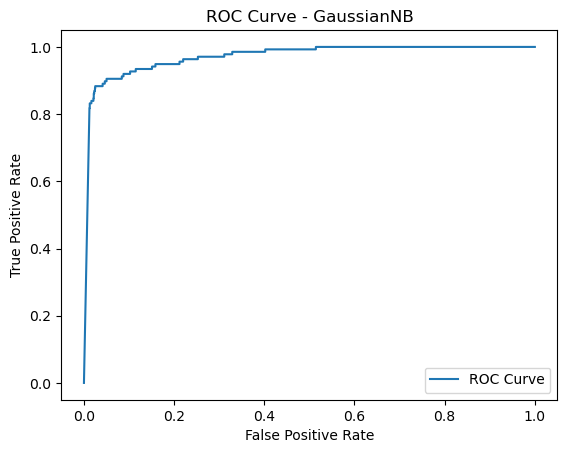

AUC Score for MultinomialNB : 0.9632472650170881


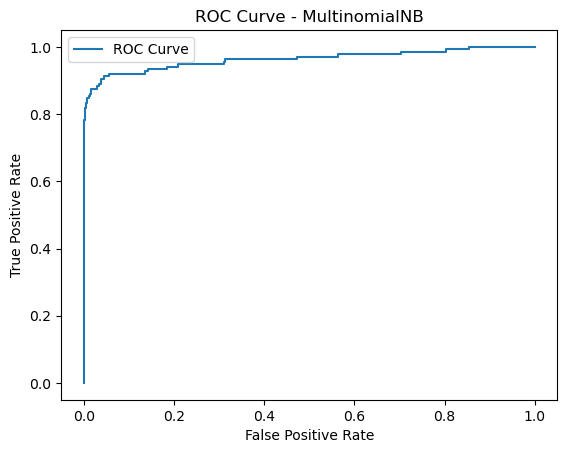

AUC Score for BernoulliNB : 0.9554933395549334


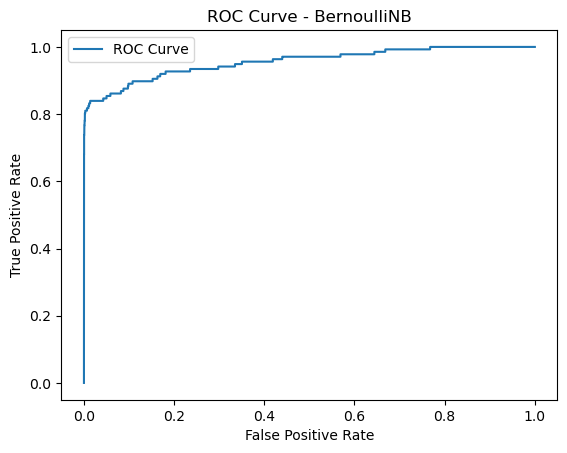

In [100]:
#GaussianNB
print("AUC Score for GaussianNB :", roc_auc_score(y_test, y_test_proba_gnb))
fpr, tpr, _ = roc_curve(y_test, y_test_proba_gnb)
plt.plot(fpr, tpr, label='ROC Curve')
plt.title("ROC Curve - GaussianNB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#MultinomialNB 
print("AUC Score for MultinomialNB :", roc_auc_score(y_test, y_test_proba_mnb))
fpr, tpr, _ = roc_curve(y_test, y_test_proba_mnb)
plt.plot(fpr, tpr, label='ROC Curve')
plt.title("ROC Curve - MultinomialNB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#BernoulliNB
print("AUC Score for BernoulliNB :", roc_auc_score(y_test, y_test_proba_bnb))
fpr, tpr, _ = roc_curve(y_test, y_test_proba_bnb)
plt.plot(fpr, tpr, label='ROC Curve')
plt.title("ROC Curve - BernoulliNB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Train the model on training set 

In [101]:
#GaussianNB
ypred_train_gnb = gnb.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train_gnb)
report_clf = classification_report(y_train, ypred_train_gnb)

print(mat_clf)
print(report_clf)

#MultinomialNB
ypred_train_mnb = mnb.predict(X_train_scaled)
mat_clf = confusion_matrix(y_train, ypred_train_mnb)
report_clf = classification_report(y_train, ypred_train_mnb)

print(mat_clf)
print(report_clf)

[[12499   297]
 [   36   183]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12796
           1       0.38      0.84      0.52       219

    accuracy                           0.97     13015
   macro avg       0.69      0.91      0.76     13015
weighted avg       0.99      0.97      0.98     13015

[[12796     0]
 [  219     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12796
           1       0.00      0.00      0.00       219

    accuracy                           0.98     13015
   macro avg       0.49      0.50      0.50     13015
weighted avg       0.97      0.98      0.97     13015



c:\Users\DELL\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [102]:
#BernoulliNB
ypred_train_bnb = bnb.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train_bnb)
report_clf = classification_report(y_train, ypred_train_bnb)

print(mat_clf)
print(report_clf)

[[12788     8]
 [   55   164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12796
           1       0.95      0.75      0.84       219

    accuracy                           1.00     13015
   macro avg       0.97      0.87      0.92     13015
weighted avg       1.00      1.00      0.99     13015

